In [43]:
# Step 1: Install and import necessary libraries
!pip install -q scikit-learn imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


In [44]:
# Step 2: Load data
df = pd.read_csv('/content/dataset_med.csv')

# Randomly sample 40% of the data
df = df.sample(frac=0.4, random_state=42).reset_index(drop=True)
print("Reduced dataset shape:", df.shape)
print(df.info())
df.head()


Reduced dataset shape: (356000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356000 entries, 0 to 355999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  356000 non-null  int64  
 1   age                 356000 non-null  float64
 2   gender              356000 non-null  object 
 3   country             356000 non-null  object 
 4   diagnosis_date      356000 non-null  object 
 5   cancer_stage        356000 non-null  object 
 6   family_history      356000 non-null  object 
 7   smoking_status      356000 non-null  object 
 8   bmi                 356000 non-null  float64
 9   cholesterol_level   356000 non-null  int64  
 10  hypertension        356000 non-null  int64  
 11  asthma              356000 non-null  int64  
 12  cirrhosis           356000 non-null  int64  
 13  other_cancer        356000 non-null  int64  
 14  treatment_type      356000 non-null  object 
 15

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,773685,37.0,Male,Lithuania,2015-09-30,Stage II,No,Current Smoker,34.5,241,0,0,0,0,Surgery,2017-05-16,0
1,278120,63.0,Female,Hungary,2024-04-01,Stage III,No,Passive Smoker,22.2,162,1,1,0,0,Combined,2025-12-10,0
2,810423,63.0,Female,Belgium,2015-05-08,Stage III,No,Former Smoker,22.8,230,0,0,1,0,Combined,2016-11-23,1
3,443588,71.0,Male,Denmark,2014-10-05,Stage II,No,Never Smoked,32.1,293,0,0,0,0,Chemotherapy,2016-06-19,1
4,701479,45.0,Female,Cyprus,2015-07-05,Stage I,No,Current Smoker,29.0,173,1,0,0,0,Surgery,2017-01-31,0


In [45]:
# Step 3: Handling missing values
print(df.isnull().sum())

# Drop rows with missing target
df = df.dropna(subset=['survived'])

# Fill missing numerical with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


In [46]:
# Step 4: Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [47]:
# Step 5: Define features and target
X = df.drop(['id', 'survived', 'diagnosis_date', 'end_treatment_date'], axis=1)
y = df['survived']

# Optional: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
# Step 6: Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)


In [49]:
# Step 7: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [50]:
# Step 8: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=40)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Accuracy: 0.8455859153152017

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86     55465
           1       0.91      0.77      0.83     55464

    accuracy                           0.85    110929
   macro avg       0.85      0.85      0.84    110929
weighted avg       0.85      0.85      0.84    110929


Confusion Matrix:
 [[51267  4198]
 [12931 42533]]


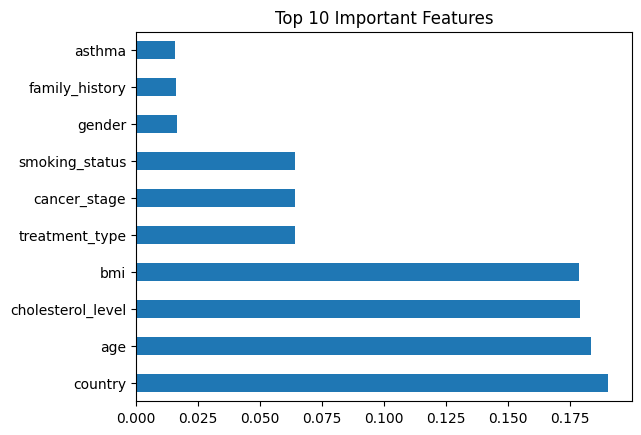

In [51]:
# Step 9: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [52]:
import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [53]:
import joblib

# Save model with compression (level: 3 is a good balance)
joblib.dump(model, 'model.pkl', compress=3)

['model.pkl']